<a href="https://colab.research.google.com/github/PX2145-2025/week-8-b-Cameron-Jones-C/blob/main/Week_8_ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

## 1 & 2)

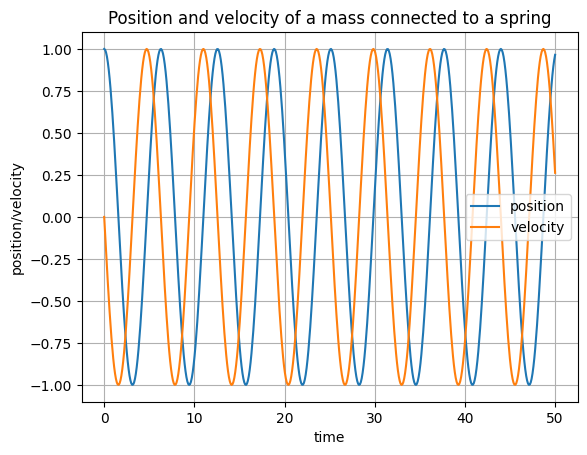

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import odeint

def spring(y, t, k, m):
  x, v = y
  dydt = [v, -(k/m)*x]
  return dydt

m = 1
k = 1
x_0 = 1
v_0 = 0
y_0 = [x_0, v_0]
t_max = 50
npts = 500
t = np.linspace(0, t_max, npts)
sol = odeint(spring, y_0, t, args=(k, m))
x = sol[:, 0]
v = sol[:, 1]
plt.plot(t, x, label='position')
plt.plot(t, v, label='velocity')
plt.legend()
plt.xlabel('time')
plt.ylabel('position/velocity')
plt.title('Position and velocity of a mass connected to a spring')
plt.grid()
plt.show()

## 3)

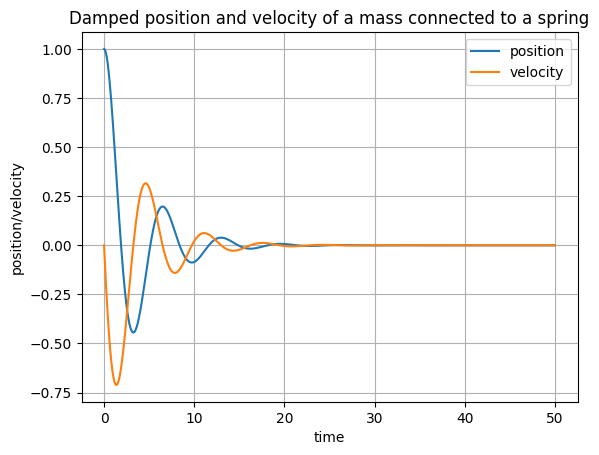

In [28]:
def spring_damped(y, t, k, m, b):
  x, v = y
  dxdt = v
  dvdt = -(k/m)*x - (b/m)*v
  return dxdt, dvdt

b = 0.5
sol_2 = odeint(spring_damped, y_0, t, args=(k, m, b))
x = sol_2[:, 0]
v = sol_2[:, 1]
plt.plot(t, x, label='position')
plt.plot(t, v, label='velocity')
plt.legend()
plt.xlabel('time')
plt.ylabel('position/velocity')
plt.title('Damped position and velocity of a mass connected to a spring')
plt.grid()
plt.show()

## 4)

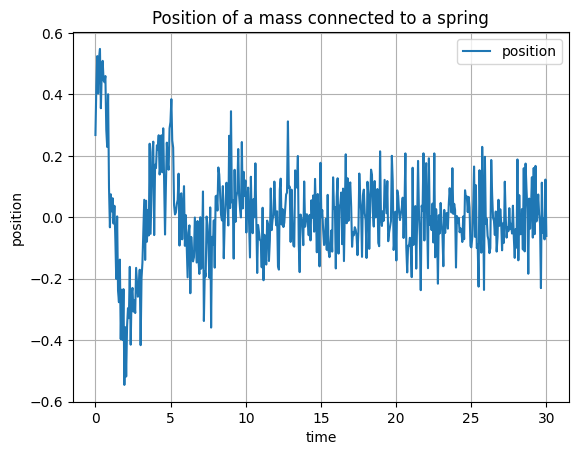

In [35]:
! wget -q https://raw.githubusercontent.com/PX2134/data/master/week8/spring_measurement.txt

data = np.loadtxt('spring_measurement.txt')
t = data[:, 0]
x = data[:, 1]
plt.plot(t, x, label='position')
plt.legend()
plt.xlabel('time')
plt.ylabel('position')
plt.title('Position of a mass connected to a spring')
plt.grid()
plt.show()

k = 1.9716935249901137 +/- 0.03174017904406665
b = 0.37904962855078617 +/- 0.022657451882234978


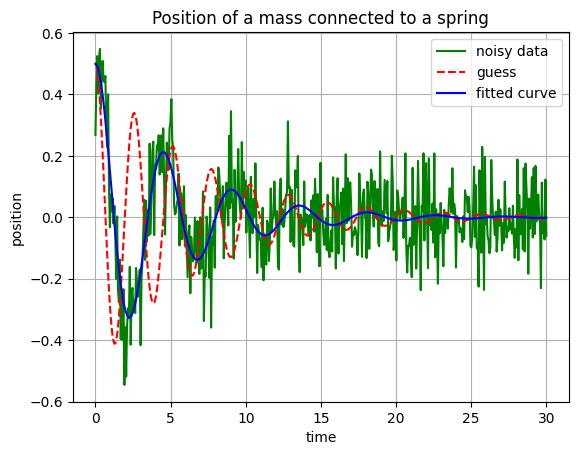

In [40]:
def fit_func(t, k, b):
  m = 1
  x_0 = 0.5
  v_0 = 0
  y_0 = [x_0, v_0]
  sol_2 = odeint(spring_damped, y_0, t, args=(k, m, b))
  return sol_2[:, 0]

k_guess = 6
b_guess = 0.3
initial_guess = [k_guess, b_guess]
x_guess = fit_func(t, *initial_guess)
boundary = ([0, 0], [np.inf, np.inf])
popt, pcov = curve_fit(fit_func, t, x, p0=initial_guess, bounds=boundary)
k_fit, b_fit = popt
p_err = np.sqrt(np.diag(pcov))
k_err, b_err = p_err
print('k =', k_fit, '+/-', k_err)
print('b =', b_fit, '+/-', b_err)
position_fit = fit_func(t, k_fit, b_fit)
plt.plot(t, x, 'g-', label='noisy data')
plt.plot(t, x_guess, 'r--', label='guess')
plt.plot(t, position_fit, 'b-', label='fitted curve')
plt.legend()
plt.xlabel('time')
plt.ylabel('position')
plt.title('Position of a mass connected to a spring')
plt.grid()
plt.show()

# Exercise 2

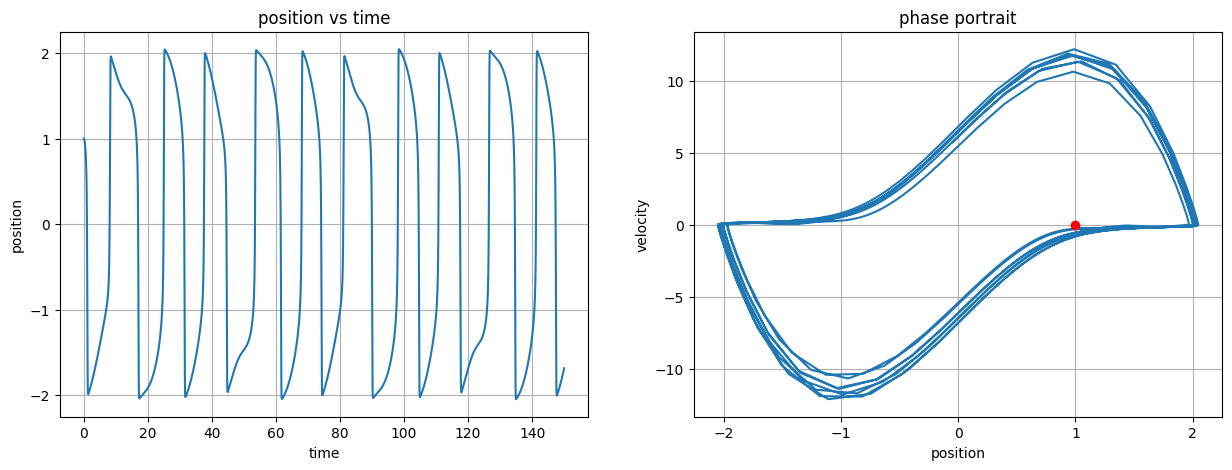

In [58]:
def oscillator(y_0, v_0, t_max, omega, A, m):

  def system(S, t, omega, A, m):
    y, v = S
    dydt = v
    dvdt = m*(1-y**2)*v - y + A*np.sin(omega*t)
    return dydt, dvdt

  t_min = 0
  S_0 = [y_0, v_0]
  npts = 5000
  t_eval = np.linspace(t_min, t_max, npts)
  sol_3 = odeint(system, S_0, t_eval, args=(omega, A, m))

  t = t_eval
  y = sol_3[:, 0]
  v = sol_3[:, 1]

  plt.figure(figsize=(15, 5))
  plt.subplot(1, 2, 1)
  plt.plot(t, y)
  plt.title('position vs time')
  plt.xlabel('time')
  plt.ylabel('position')
  plt.grid()

  skip = int(npts * 0.25)

  plt.subplot(1, 2, 2)
  plt.plot(y[skip:], v[skip:])
  plt.plot(y[0], v[0], 'ro')
  plt.title('phase portrait')
  plt.xlabel('position')
  plt.ylabel('velocity')
  plt.grid()
  plt.show()

A = 1
y_0 = 1
v_0 = 0
m = 8
omega = 0.6
t_max = 150
oscillator(y_0, v_0, t_max, omega, A, m)

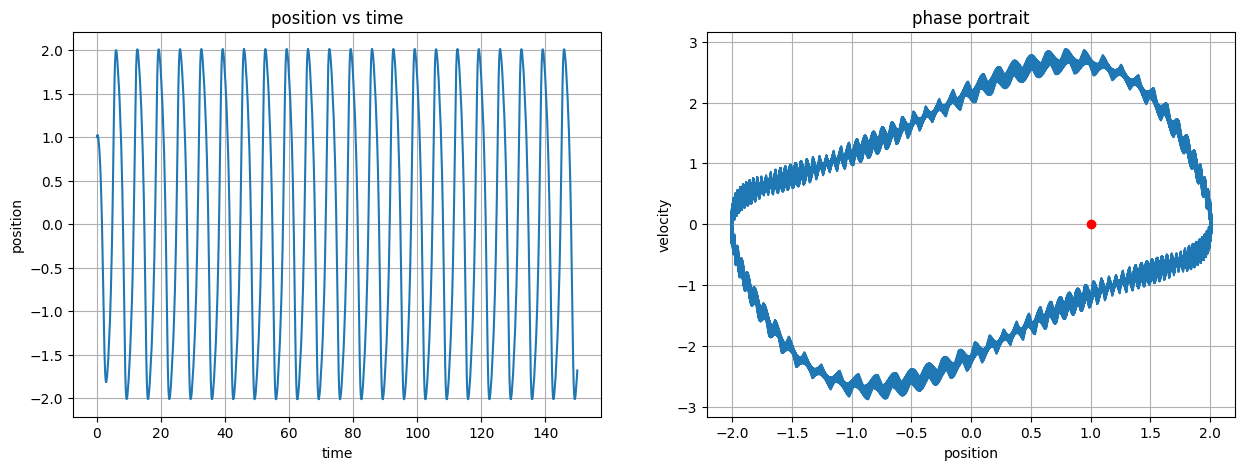

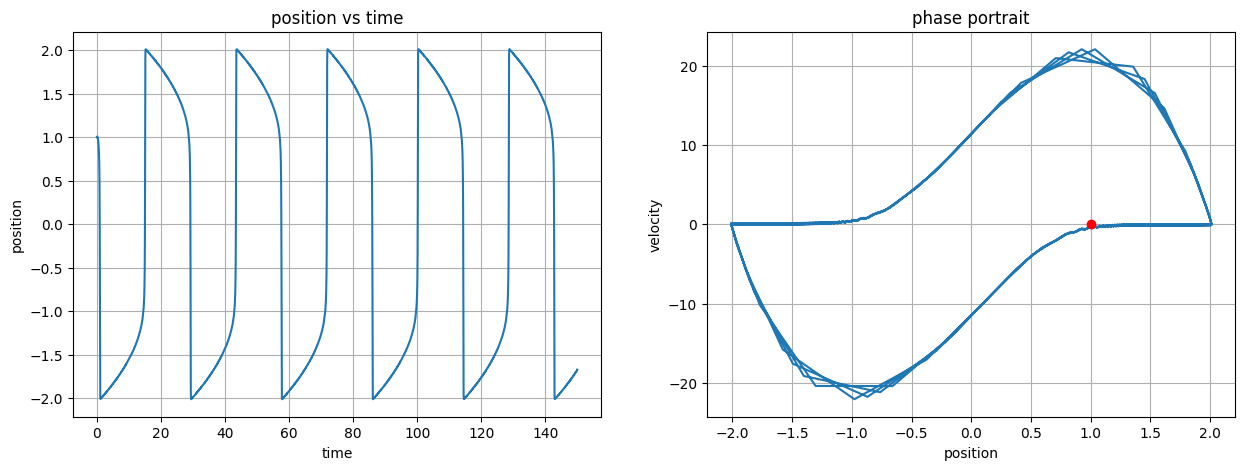

In [59]:
m_1 = 1
A_1 = 20
omega_1 = 100

oscillator(y_0, v_0, t_max, omega_1, A_1, m_1)

m_2 = 16
A_2 = 5
omega_2 = 50

oscillator(y_0, v_0, t_max, omega_2, A_2, m_2)